In [10]:
import numpy as np
import pandas as pd
import rasterio as rio
import geopandas as gpd
import seaborn as sns


import os

In [2]:
### Importing the data
# Here we will load data into notebook. Note: always make copy of original data prior to uploading.
# need to do ALOT of data processing and cleaning up!


In [11]:
# generating string variables to upload

#path_to_excel = r'C:\Users\josem\Documents\Research\Repository_Tables_Portenga_Bierman_GSA_Today_2011_COPY.xlsx' # COPY of original data
path_to_excel = '/Users/josemarmolejo/Downloads/Repository_Tables_Portenga_Bierman_GSA_Today_2011_COPY.xlsx'

sheet1 = 'Table DR1. Study References' #first sheet in excel.xlsx  Note: string must be IDENTICAL to file sheet name. open excel and compy and paste!
sheet2 = 'Table DR2. Bedrock Data' #second
sheet3 = 'Table DR3. Basin Data'
sheet4 = 'Table DR4. Coverage References'
sheet5 = 'Table DR5. Regression Equations' # last sheet

# using pandas to open excel file with multiple sheets
xls = pd.ExcelFile(path_to_excel)
df1 = pd.read_excel(xls, sheet1, header = 1) 
df2 = pd.read_excel(xls, sheet2, header = 1)
df3 = pd.read_excel(xls, sheet3, header = 1) 
df4 = pd.read_excel(xls, sheet4, header = 1)
df5 = pd.read_excel(xls, sheet5, header = 1)

In [4]:
# ok... so the data is VERY messy! note how in the original file the last few rows typically contain metadata such as particle accelerator, etc..
# we dont need this for doing cool ML stuff so...
# 1) we need to cut it OUT!
# 2) get deal with any secret spaces! for example: "hello" vs " hello" or " hello " or " hello "
# 3) next deal with spaces within sample id's! for example: "sample 2" should be "sample_2" note: for this project all spaces within samples will be changed to "_" this is to avoid space errors that could arise
# 4) deal with special characters "#"  "@"  "%"  "("  ")" etc..
print('wut')
df3.tail(20)
#df1.iloc[0:118,:]

wut


,Citation,Sample ID,Location,Latitude (decimal degrees),Longitude (decimal degrees),Mean Basin Elevation (m)a,Basin Relief (m)b,Basin Area (km2)c,Mean Latitude (decimal degrees)d,Mean Longitude (decimal degrees)d,...,Climate Zone (Main)j,Climate Zone (Sub-category)j,Original 10Be Concentration (at g-1),Original 10Be Concentration Error (at g-1),AMS Standard,Published Erosion Rate (m My-1)k,Published Erosion Rate Error (m My-1)k,CRONUS Erosion Rate (m My-1),CRONUS Erosion Rate Error (m My-1),% Difference between Published and CRONUS Erosion Ratesl
1387,Wittmann et al. (2009),MAR 18a-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,46700.0,10600.0,S555,90.0,20.0,126.10,31.54,40.111111
1388,Wittmann et al. (2009),MAR 18a-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,53300.0,20800.0,S555,80.0,30.0,109.99,51.81,37.487500
1389,Wittmann et al. (2009),MAD 19a,"Madeira at Ribeirao, Bolivia",-10.229,-65.281,727.6167,6309,770668.0,-14.4085,-65.7867,...,Tropical,Savannah,39700.0,5200.0,S555,120.0,20.0,169.28,25.14,41.066667
1390,Wittmann et al. (2009),MAD 20a,"Madeira at Porto Velho, Bolivia",-8.770,-63.909,688.9935,6349,828386.0,-14.1123,-65.7812,...,Tropical,Savannah,35250.0,3750.0,S555,130.0,15.0,186.22,23.33,43.246154
1391,Wittmann et al. (2009),MAD 20a-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38700.0,4100.0,S555,120.0,10.0,169.26,21.16,41.050000
1392,Wittmann et al. (2009),MAD 20a-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,31800.0,3400.0,S555,140.0,20.0,206.87,25.99,47.764286
1393,Italics represent replicate samples,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1394,Boldface represents the average of the replica...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1395,a Elevation data were extracted from sattelite...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1396,b Relief is measured as the difference in elev...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# finding errors in sheet 2 - 3 this is what we will mostly need!
pd.unique(df2.columns)[3] # OMG WHY!!!!! this is why things need to be fixed  >:(


'Latitude         (decimal degrees)'

In [4]:
# fixing column names in df2 and df3
pd.unique(df2.columns)
#pd.unique(df3.columns)



array(['Citation', 'Sample ID', 'Location',
       'Latitude         (decimal degrees)',
       'Longitude (decimal degrees)', 'Elevation (m)a', 'Relief (m)b',
       'Rock Type (specific)', 'Rock Type (General)',
       'Sample Thickness (cm)', 'Sample Geometry',
       'Mean Annual Precipitation (mm yr-1)c',
       'Mean Annual Temperature (°C)c', 'Seismicityd', 'Seismic Regimee',
       'Climate Zone (Main)f', 'Climate Zone (Sub-category)f',
       'Original 10Be Concentration (at g-1)',
       'Original 10Be Concentration Error (at g-1)', 'AMS Standard',
       'Published Erosion Rate (m My-1)g',
       'Published Erosion Rate Error (m My-1)g',
       'CRONUS Erosion Rate (m My-1)',
       'CRONUS Erosion Rate Error (m My-1)',
       '% Difference between Published and CRONUS Erosion Ratesk'],
      dtype=object)

In [ ]:
df2 = df2.rename(columns={
                    'Latitude         (decimal degrees)': 'Latitude',
                    'Longitude (decimal degrees)' : 'Longitude',
                    'Elevation (m)a': 'Elevation m',
                    'Relief (m)b'   : 'Relief m',
                    'Rock Type (specific)' : 'Rock specific',
                    'Rock Type (General)'  : 'Rock general',
                    'Sample Thickness (cm)': 'Thickness cm',
                    'Mean Annual Precipitation (mm yr-1)c' : 'MAP mm yr-1',
                    'Mean Annual Temperature (°C)c' :'MAT C',
                    'Climate Zone (Main)f' : 'Clim main',
                    'Climate Zone (Sub-category)f' : 'Clim subcategory',
                    'Seismicityd' : 'Seismicity',
                    'Original 10Be Concentration (at g-1)': 'Orig10Be Conc_at g-1',
                    'Original 10Be Concentration Error (at g-1)' : 'Org10Be_er',
                    'CRONUS Erosion Rate (m My-1)' : 'Erosion_rt' ,
                    'CRONUS Erosion Rate Error (m My-1)': 'Erosion_er',
                    '% Difference between Published and CRONUS Erosion Ratesk' : 'Percentdif between Published and CRONUS Erosion Rates'
                    
                   
                   
                   })

In [5]:
df2 = df2.rename(columns={
                    'Latitude         (decimal degrees)': 'Latitude',
                    'Longitude (decimal degrees)' : 'Longitude',
                    'Elevation (m)a' : 'Elevation m',
                    'Relief (m)b'   : 'Relief meters',
                    'Rock Type (specific)' : 'Rock Type specific',
                    'Rock Type (General)'  : 'Rock Type general',
                    'Sample Thickness (cm)':'Sample Thickness cm',
                    'Mean Annual Precipitation (mm yr-1)c' : 'Mean Annual Precipitation mm yr-1',
                    'Mean Annual Temperature (°C)c' :'Mean Annual Temperature C',
                    'Climate Zone (Main)f' : 'Climate Zone main',
                    'Climate Zone (Sub-category)f' : 'Climate Zone sub-category',
                    'Seismicityd' : 'Seismicity',
                    'Original 10Be Concentration (at g-1)': 'Original 10Be Concentration_at g-1',
                    'Original 10Be Concentration Error (at g-1)' : 'Original 10Be Concentration Error_at g-1',
                    'CRONUS Erosion Rate (m My-1)' : 'CRONUS Erosion Rate_m My-1' ,
                    'CRONUS Erosion Rate Error (m My-1)': 'CRONUS Erosion Rate Error_m My-1',
                    '% Difference between Published and CRONUS Erosion Ratesk' : 'Percent Difference between Published and CRONUS Erosion Rates'
                    
                   
                   
                   })

In [8]:
df2.columns

Index(['Citation', 'Sample ID', 'Location', 'Latitude',
       'Longitude (decimal degrees)', 'Elevation m', 'Relief meters',
       'Rock Type specific', 'Rock Type general', 'Sample Thickness cm',
       'Sample Geometry', 'Mean Annual Precipitation mm yr-1',
       'Mean Annual Temperature C', 'Seismicity', 'Seismic Regimee',
       'Climate Zone main', 'Climate Zone sub-category',
       'Original 10Be Concentration_at g-1',
       'Original 10Be Concentration Error_at g-1', 'AMS Standard',
       'Published Erosion Rate (m My-1)g',
       'Published Erosion Rate Error (m My-1)g', 'CRONUS Erosion Rate_m My-1',
       'CRONUS Erosion Rate Error_m My-1',
       'Percent Difference between Published and CRONUS Erosion Rates'],
      dtype='object')

In [6]:
# getting rid of NaN in df2
df2_new = df2.loc[df2['Sample ID'].notna()]


In [7]:
sample_names = list(df2_new['Sample ID'].unique())

In [8]:
badnames_space = [i for i in sample_names if len(i.split(' ')) != 1] # if done correct, after split by ' ' shouldn't be >1
badnames_integers= [i for i in sample_names if i[0].isdigit()] # if the first stringt is a digit it will be flaged

for i in badnames_space:
    newstring = i.replace(" ", "_")
    new = df2_new.loc[df2_new['Sample ID'] == i]
    new['Sample ID'] = newstring
    df2_new.loc[df2_new['Sample ID'] == i] = new

for i in badnames_integers:
    intstring = 'UNAMED_' + i
    new = df2_new.loc[df2_new['Sample ID'] == i]
    new['Sample ID'] = intstring
    df2_new.loc[df2_new['Sample ID'] == i] = new


            
            


/var/folders/sw/mhkb00254hv9_crfbfcqxq2h0000gn/T/ipykernel_12676/3163731186.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Sample ID'] = newstring
/var/folders/sw/mhkb00254hv9_crfbfcqxq2h0000gn/T/ipykernel_12676/3163731186.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Sample ID'] = intstring


In [9]:
# TESTING SHOULD BE EMPTY LISTS!!!!!!!
# this is because of the pandas SettingWithCopyWarning 
# it is informing that assignment is ambiguous and therefore not guaranteed to work
# Example: new['Sample ID'] = intstring
# just a note incase of errors in future 

# below is to check and make sure it all passed and warning did not affect label assigment

sample_names = list(df2_new['Sample ID'].unique())
badnames_space = [i for i in sample_names if len(i.split(' ')) != 1] # if done correct, after split by ' ' shouldn't be >1
badnames_integers= [i for i in sample_names if i[0].isdigit()] # if the first stringt is a digit it will be flaged

print(badnames_space)
print(badnames_integers)

[]
[]


# Extracting the columns we want!

In [39]:
df2_new.columns

Index(['Citation', 'Sample ID', 'Location', 'Latitude', 'Longitude',
       'Elevation m', 'Relief meters', 'Rock Type specific',
       'Rock Type general', 'Sample Thickness cm', 'Sample Geometry',
       'Mean Annual Precipitation mm yr-1', 'Mean Annual Temperature C',
       'Seismicity', 'Seismic Regimee', 'Climate Zone main',
       'Climate Zone sub-category', 'Original 10Be Concentration_at g-1',
       'Original 10Be Concentration Error_at g-1', 'AMS Standard',
       'Published Erosion Rate (m My-1)g',
       'Published Erosion Rate Error (m My-1)g', 'CRONUS Erosion Rate_m My-1',
       'CRONUS Erosion Rate Error_m My-1',
       'Percent Difference between Published and CRONUS Erosion Rates'],
      dtype='object')

In [14]:
df2_export = df2_new[[
         'Sample ID',
         'Original 10Be Concentration_at g-1',
         'Original 10Be Concentration Error_at g-1',
         'CRONUS Erosion Rate_m My-1',
         'CRONUS Erosion Rate Error_m My-1',
         'Percent Difference between Published and CRONUS Erosion Rates',
         'Elevation meters', 
         'Relief meters', 
         'Rock Type specific',
         'Rock Type general', 
         'Sample Thickness cm', 
         'Sample Geometry',
         'Mean Annual Precipitation mm yr-1', 
         'Mean Annual Temperature C',
         'Seismicity',
         'Climate Zone main',
         'Climate Zone sub-category',
         'Latitude',
         'Longitude'
        ]]

KeyError: "['Elevation meters', 'Longitude'] not in index"

In [32]:
df2.columns

Index(['Citation', 'Sample ID', 'Location', 'Latitude',
       'Longitude (decimal degrees)', 'Elevation m', 'Relief meters',
       'Rock Type specific', 'Rock Type general', 'Sample Thickness cm',
       'Sample Geometry', 'Mean Annual Precipitation mm yr-1',
       'Mean Annual Temperature C', 'Seismicity', 'Seismic Regimee',
       'Climate Zone main', 'Climate Zone sub-category',
       'Original 10Be Concentration_at g-1',
       'Original 10Be Concentration Error_at g-1', 'AMS Standard',
       'Published Erosion Rate (m My-1)g',
       'Published Erosion Rate Error (m My-1)g', 'CRONUS Erosion Rate_m My-1',
       'CRONUS Erosion Rate Error_m My-1',
       'Percent Difference between Published and CRONUS Erosion Rates'],
      dtype='object')

In [ ]:
gdf = gpd.GeoDataFrame(df2_export, geometry = gpd.points_from_xy(df2_export.Longitude, df2_export.Latitude))
gdf.to_file("test_be10rock.shp")

# Now dealing with drainage basins

In [12]:
# EVENTUALLY!!! ESRI shape files only allow 10char :(

df3 = df3.rename(columns={
                    'Latitude      (decimal degrees)': 'Latitude',
                    'Longitude (decimal degrees)' : 'Longitude',
                    'Elevation (m)a': 'Elevation meters',
                    'Relief (m)b'   : 'Relief meters',
                    'Rock Type (specific)' : 'Rock Type specific',
                    'Rock Type (General)'  : 'Rock Type general',
                    'Sample Thickness (cm)':'Sample Thickness cm',
                    'Mean Annual Precipitation (mm yr-1)c' : 'Mean Annual Precipitation mm yr-1',
                    'Mean Annual Temperature (°C)c' :'Mean Annual Temperature C',
                    'Climate Zone (Main)f' : 'Climate Zone main',
                    'Climate Zone (Sub-category)f' : 'Climate Zone sub-category',
                    'Seismicityd' : 'Seismicity',
                    'Original 10Be Concentration (at g-1)': 'Original 10Be Concentration_at g-1',
                    'Original 10Be Concentration Error (at g-1)' : 'Original 10Be Concentration Error_at g-1',
                    'CRONUS Erosion Rate (m My-1)' : 'CRONUS Erosion Rate_m My-1' ,
                    'CRONUS Erosion Rate Error (m My-1)': 'CRONUS Erosion Rate Error_m My-1',
                    '% Difference between Published and CRONUS Erosion Ratesk' : 'Percent Difference between Published and CRONUS Erosion Rates'
                    
                   
                   
                   })

In [8]:
#### THIS IS DUMMMMMB!!!!!!! FIX
# EVENTUALLY!!! ESRI shape files only allow 10char :(

df3 = df3.rename(columns={
                    'Latitude      (decimal degrees)': 'Latitude',
                    'Longitude (decimal degrees)' : 'Longitude',
                    'Mean Basin Elevation (m)a': 'Elevation m',
                    'Relief (m)b'   : 'Relief meters',
                    'Rock Type (specific)' : 'Rock Type specific',
                    'Rock Type (General)'  : 'Rock Type general',
                    'Sample Thickness (cm)':'Sample Thickness cm',
                    'Mean Annual Precipitation (mm yr-1)c' : 'Mean Annual Precipitation mm yr-1',
                    'Mean Annual Temperature (°C)c' :'Mean Annual Temperature C',
                    'Climate Zone (Main)f' : 'Climate Zone main',
                    'Climate Zone (Sub-category)f' : 'Climate Zone sub-category',
                    'Seismicityd' : 'Seismicity',
                    'Original 10Be Concentration (at g-1)': 'Original 10Be Concentration_at g-1',
                    'Original 10Be Concentration Error (at g-1)' : 'Original 10Be Concentration Error_at g-1',
                    'CRONUS Erosion Rate (m My-1)' : 'CRONUS Erosion Rate_m My-1' ,
                    'CRONUS Erosion Rate Error (m My-1)': 'CRONUS Erosion Rate Error_m My-1',
                    '% Difference between Published and CRONUS Erosion Ratesk' : 'Percent Difference between Published and CRONUS Erosion Rates'
                    
                   
                   
                   })

In [9]:
df3.columns

Index(['Citation', 'Sample ID', 'Location', 'Latitude', 'Longitude',
       'Elevation m', 'Basin Relief (m)b', 'Basin Area (km2)c',
       'Mean Latitude (decimal degrees)d', 'Mean Longitude (decimal degrees)d',
       'Effective Basin Elevation (m)d', 'Mean Basin Slope (°)e',
       'Rock Type general', 'Mean Annual Precipitation (mm yr-1)f',
       'Mean Annual Temperature (°C)f', '% Vegetationg', 'Seismicityh',
       'Seismic Regimei', 'Climate Zone (Main)j',
       'Climate Zone (Sub-category)j', 'Original 10Be Concentration_at g-1',
       'Original 10Be Concentration Error_at g-1', 'AMS Standard',
       'Published Erosion Rate (m My-1)k',
       'Published Erosion Rate Error (m My-1)k', 'CRONUS Erosion Rate_m My-1',
       'CRONUS Erosion Rate Error_m My-1',
       '% Difference between Published and CRONUS Erosion Ratesl'],
      dtype='object')

In [18]:
# EVENTUALLY!!! ESRI shape files only allow 10char :(

df3 = df3.rename(columns={
                    'Latitude         (decimal degrees)': 'Latitude',
                    'Longitude (decimal degrees)' : 'Longitude',
                    'Elevation (m)a': 'Elevation m',
                    'Relief (m)b'   : 'Relief m',
                    'Rock Type (specific)' : 'Rock specific',
                    'Rock Type (General)'  : 'Rock general',
                    'Sample Thickness (cm)': 'Thickness cm',
                    'Mean Annual Precipitation (mm yr-1)c' : 'MAP mm yr-1',
                    'Mean Annual Temperature (°C)c' :'MAT C',
                    'Climate Zone (Main)f' : 'Clim main',
                    'Climate Zone (Sub-category)f' : 'Clim subcategory',
                    'Seismicityd' : 'Seismicity',
                    'Original 10Be Concentration (at g-1)': 'Orig10Be Conc_at g-1',
                    'Original 10Be Concentration Error (at g-1)' : 'Org10Be_er',
                    'CRONUS Erosion Rate (m My-1)' : 'Erosion_rt' ,
                    'CRONUS Erosion Rate Error (m My-1)': 'Erosion_er',
                    '% Difference between Published and CRONUS Erosion Ratesk' : 'Percentdif between Published and CRONUS Erosion Rates'
                    
                   
                   
                   })

In [13]:
# getting rid of NaN in df2
df3_new = df3.loc[df3['Sample ID'].notna()]

sample_names = list(df3_new['Sample ID'].unique())

badnames_integers= [i for i in sample_names if str(i)[0].isdigit()] # if the first stringt is a digit it will be flaged




In [14]:
df3_new.loc[df3_new['Sample ID'] == 2]  ### left off here

# need to add citations to all samples to be able to add sample id that do not work!

,Citation,Sample ID,Location,Latitude,Longitude,Mean Basin Elevation (m)a,Basin Relief (m)b,Basin Area (km2)c,Mean Latitude (decimal degrees)d,Mean Longitude (decimal degrees)d,...,Climate Zone (Main)j,Climate Zone (Sub-category)j,Original 10Be Concentration_at g-1,Original 10Be Concentration Error_at g-1,AMS Standard,Published Erosion Rate (m My-1)k,Published Erosion Rate Error (m My-1)k,CRONUS Erosion Rate_m My-1,CRONUS Erosion Rate Error_m My-1,% Difference between Published and CRONUS Erosion Ratesl
314,Cyr et al. (2010),2,Fiumedinisi at Nizza di Scilia,38.0027,15.40523,667.02936,1200,49.088699,38.0442,15.367,...,Temperate,"Hot, dry summer",4200.0,1100.0,07KNSTD,1440.0,400.0,1554.14,448.43,7.926389


In [15]:
for i in badnames_integers:
    df3_new.loc[df3_new['Sample ID'] == 2]
    
    
    
    
    #intstring = 'UNAMED_' + str(i)
    #new = df3_new.loc[df3_new['Sample ID'] == str(i)]
    #new['Sample ID'] = intstring
    #df3_new.loc[df3_new['Sample ID'] == str(i)] = new

In [22]:
badnames_space = [i for i in sample_names if len(i.split(' ')) != 1] # if done correct, after split by ' ' shouldn't be >1
#badnames_integers= [i for i in sample_names if str(i)[0].isdigit()] # if the first stringt is a digit it will be flaged


for i in badnames_space:
    
    newstring = str(i).replace(" ", "_")
    new = df3_new.loc[df3_new['Sample ID'] == str(i)]
    new['Sample ID'] = newstring
    df3_new.loc[df3_new['Sample ID'] == str(i)] = new

for i in badnames_integers:
    intstring = 'UNAMED_' + str(i)
    new = df3_new.loc[df3_new['Sample ID'] == str(i)]
    new['Sample ID'] = intstring
    df3_new.loc[df3_new['Sample ID'] == str(i)] = new


                      


AttributeError: 'int' object has no attribute 'split'

In [23]:
gdf = gpd.GeoDataFrame(df2021, geometry = gpd.points_from_xy(df2021.LONGITUDE, df2021.LATITUDE))

NameError: name 'df2021' is not defined

In [24]:
df3_new.loc[df3_new['Sample ID'] == 2]

,Citation,Sample ID,Location,Latitude,Longitude,Elevation m,Basin Relief (m)b,Basin Area (km2)c,Mean Latitude (decimal degrees)d,Mean Longitude (decimal degrees)d,...,Climate Zone (Main)j,Climate Zone (Sub-category)j,Original 10Be Concentration_at g-1,Original 10Be Concentration Error_at g-1,AMS Standard,Published Erosion Rate (m My-1)k,Published Erosion Rate Error (m My-1)k,CRONUS Erosion Rate_m My-1,CRONUS Erosion Rate Error_m My-1,% Difference between Published and CRONUS Erosion Ratesl
314,Cyr et al. (2010),2,Fiumedinisi at Nizza di Scilia,38.0027,15.40523,667.02936,1200,49.088699,38.0442,15.367,...,Temperate,"Hot, dry summer",4200.0,1100.0,07KNSTD,1440.0,400.0,1554.14,448.43,7.926389


In [25]:
df3_new.columns

Index(['Citation', 'Sample ID', 'Location', 'Latitude', 'Longitude',
       'Elevation m', 'Basin Relief (m)b', 'Basin Area (km2)c',
       'Mean Latitude (decimal degrees)d', 'Mean Longitude (decimal degrees)d',
       'Effective Basin Elevation (m)d', 'Mean Basin Slope (°)e',
       'Rock Type general', 'Mean Annual Precipitation (mm yr-1)f',
       'Mean Annual Temperature (°C)f', '% Vegetationg', 'Seismicityh',
       'Seismic Regimei', 'Climate Zone (Main)j',
       'Climate Zone (Sub-category)j', 'Original 10Be Concentration_at g-1',
       'Original 10Be Concentration Error_at g-1', 'AMS Standard',
       'Published Erosion Rate (m My-1)k',
       'Published Erosion Rate Error (m My-1)k', 'CRONUS Erosion Rate_m My-1',
       'CRONUS Erosion Rate Error_m My-1',
       '% Difference between Published and CRONUS Erosion Ratesl'],
      dtype='object')

In [26]:
df3_export = df3_new[[
         'Citation',
         'Sample ID',
         'Original 10Be Concentration_at g-1',
         'Original 10Be Concentration Error_at g-1',
         'CRONUS Erosion Rate_m My-1',
         'CRONUS Erosion Rate Error_m My-1',
         'Percent Difference between Published and CRONUS Erosion Rates',
         'Elevation meters', 
         'Relief meters', 
         'Rock Type specific',
         'Rock Type general', 
         'Sample Thickness cm', 
         'Sample Geometry',
         'Mean Annual Precipitation mm yr-1', 
         'Mean Annual Temperature C',
         'Seismicity',
         'Climate Zone main',
         'Climate Zone sub-category',
         'Latitude',
         'Longitude'
        ]]

KeyError: "['Percent Difference between Published and CRONUS Erosion Rates', 'Elevation meters', 'Relief meters', 'Rock Type specific', 'Sample Thickness cm', 'Sample Geometry', 'Mean Annual Precipitation mm yr-1', 'Mean Annual Temperature C', 'Seismicity', 'Climate Zone main', 'Climate Zone sub-category'] not in index"

In [27]:
gdf = gpd.GeoDataFrame(df3, geometry = gpd.points_from_xy(df3.Longitude, df3.Latitude))
gdf.to_file("test_be10basin.shp")

/var/folders/sw/mhkb00254hv9_crfbfcqxq2h0000gn/T/ipykernel_916/538365631.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("test_be10basin.shp")


In [28]:
'Latitude         (decimal degrees)': 'Latitude',
                    'Longitude (decimal degrees)' : 'Longitude',
                    'Elevation (m)a': 'Elevation m',
                    'Relief (m)b'   : 'Relief m',
                    'Rock Type (specific)' : 'Rock specific',
                    'Rock Type (General)'  : 'Rock general',
                    'Sample Thickness (cm)': 'Thickness cm',
                    'Mean Annual Precipitation (mm yr-1)c' : 'MAP mm yr-1',
                    'Mean Annual Temperature (°C)c' :'MAT C',
                    'Climate Zone (Main)f' : 'Clim main',
                    'Climate Zone (Sub-category)f' : 'Clim subcategory',
                    'Seismicityd' : 'Seismicity',
                    'Original 10Be Concentration (at g-1)': 'Orig10Be Conc_at g-1',
                    'Original 10Be Concentration Error (at g-1)' : 'Org10Be_er',
                    'CRONUS Erosion Rate (m My-1)' : 'Erosion_rt' ,
                    'CRONUS Erosion Rate Error (m My-1)': 'Erosion_er',
                    '% Difference between Published and CRONUS Erosion Ratesk' : 'Percentdif between Published and CRONUS Erosion Rates'
                    

SyntaxError: illegal target for annotation (787627390.py, line 1)

In [29]:
df2_new.columns


Index(['Citation', 'Sample ID', 'Location', 'Latitude',
       'Longitude (decimal degrees)', 'Elevation m', 'Relief meters',
       'Rock Type specific', 'Rock Type general', 'Sample Thickness cm',
       'Sample Geometry', 'Mean Annual Precipitation mm yr-1',
       'Mean Annual Temperature C', 'Seismicity', 'Seismic Regimee',
       'Climate Zone main', 'Climate Zone sub-category',
       'Original 10Be Concentration_at g-1',
       'Original 10Be Concentration Error_at g-1', 'AMS Standard',
       'Published Erosion Rate (m My-1)g',
       'Published Erosion Rate Error (m My-1)g', 'CRONUS Erosion Rate_m My-1',
       'CRONUS Erosion Rate Error_m My-1',
       'Percent Difference between Published and CRONUS Erosion Rates'],
      dtype='object')

In [392]:
df3_new

,Citation,Sample ID,Location,Latitude,Longitude,Elevation m,Basin Relief (m)b,Basin Area (km2)c,Mean Latitude (decimal degrees)d,Mean Longitude (decimal degrees)d,...,Climate Zone (Main)j,Climate Zone (Sub-category)j,Original 10Be Concentration_at g-1,Original 10Be Concentration Error_at g-1,AMS Standard,Published Erosion Rate (m My-1)k,Published Erosion Rate Error (m My-1)k,CRONUS Erosion Rate_m My-1,CRONUS Erosion Rate Error_m My-1,% Difference between Published and CRONUS Erosion Ratesl
0,Abbuhl et al. (2010),Piu11,"Yapatera River, Peru",-4.9181,-79.8939,3076.2090,141,1.141300,-4.9296,-4.9181,...,Arid,Hot Steppe,2233000.0,54000.0,NIST_30300,8.86,1.26,6.95,0.72,-21.557562
1,Abbuhl et al. (2010),Piu10,NaN,-4.9451,-79.9960,2079.6367,2286,93.879601,-4.9071,-4.9451,...,Arid,Hot Steppe,73200.0,5600.0,NIST_30300,157.00,24.00,128.23,13.19,-18.324841
2,Abbuhl et al. (2010),Piu9,NaN,-5.0183,-80.0537,1671.0070,3078,153.989000,-4.9376,-5.0183,...,Arid,Hot Steppe,62400.0,5200.0,NIST_30300,155.00,24.00,126.29,13.51,-18.522581
3,Abbuhl et al. (2010),Piu8,NaN,-5.0856,-80.1315,1437.6952,3250,186.689000,-4.9563,-5.0856,...,Arid,Hot Steppe,59100.0,5300.0,NIST_30300,148.00,24.00,122.11,13.64,-17.493243
4,Abbuhl et al. (2010),Piu6,NaN,-5.1041,-80.1583,1394.2614,3264,192.974000,-4.9607,-5.1041,...,Arid,Hot Steppe,79200.0,3900.0,NIST_30300,107.60,15.00,89.53,7.33,-16.793680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,Wittmann et al. (2009),MAR 18a-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,53300.0,20800.0,S555,80.00,30.00,109.99,51.81,37.487500
1389,Wittmann et al. (2009),MAD 19a,"Madeira at Ribeirao, Bolivia",-10.2290,-65.2810,727.6167,6309,770668.000000,-14.4085,-65.7867,...,Tropical,Savannah,39700.0,5200.0,S555,120.00,20.00,169.28,25.14,41.066667
1390,Wittmann et al. (2009),MAD 20a,"Madeira at Porto Velho, Bolivia",-8.7700,-63.9090,688.9935,6349,828386.000000,-14.1123,-65.7812,...,Tropical,Savannah,35250.0,3750.0,S555,130.00,15.00,186.22,23.33,43.246154
1391,Wittmann et al. (2009),MAD 20a-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38700.0,4100.0,S555,120.00,10.00,169.26,21.16,41.050000


In [390]:
df2_new


,Citation,Sample ID,Location,Latitude,Longitude,Elevation m,Relief meters,Rock Type specific,Rock Type general,Sample Thickness cm,...,Climate Zone main,Climate Zone sub-category,Original 10Be Concentration_at g-1,Original 10Be Concentration Error_at g-1,AMS Standard,Published Erosion Rate (m My-1)g,Published Erosion Rate Error (m My-1)g,CRONUS Erosion Rate_m My-1,CRONUS Erosion Rate Error_m My-1,Percent Difference between Published and CRONUS Erosion Rates
0,Albrecht et al. (1993)h,S01,"Pajarito Plateau, Valles Caldera Region, New M...",35.834566,-106.371692,2483.0,1042.0,Welded Tuff,Igneous,3.0,...,Cold,Warm summer without dry season,1880000.0,0.0,KNSTD,NaN,NaN,6.480,0.54,NaN
1,NaN,S02,NaN,35.792952,-106.271056,2020.0,567.0,Welded Tuff,Igneous,3.0,...,Cold,Warm summer without dry season,2750000.0,0.0,KNSTD,NaN,NaN,4.270,0.37,NaN
2,NaN,S03,NaN,35.787481,-106.244529,1971.0,499.0,Welded Tuff,Igneous,3.0,...,Cold,Warm summer without dry season,2755000.0,0.0,KNSTD,NaN,NaN,4.275,0.37,NaN
3,NaN,S03,NaN,35.787481,-106.244529,1971.0,499.0,Welded Tuff,Igneous,3.0,...,Cold,Warm summer without dry season,2910000.0,0.0,KNSTD,NaN,NaN,4.010,0.35,NaN
4,NaN,S03r,NaN,35.787481,-106.244529,1971.0,499.0,Welded Tuff,Igneous,3.0,...,Cold,Warm summer without dry season,2600000.0,0.0,KNSTD,NaN,NaN,4.540,0.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,NaN,BM-7,NaN,-33.405067,150.173246,1124.0,281.0,Sandstone,Sedimentary,3.0,...,Temperate,Warm summer without dry season,549000.0,34000.0,NIST_30000,9.8,0.7,12.690,1.27,29.489796
526,NaN,BM-9,NaN,-33.404839,150.173625,1124.0,281.0,Sandstone,Sedimentary,3.0,...,Temperate,Warm summer without dry season,548000.0,24000.0,NIST_30000,9.9,0.5,12.720,1.13,28.484848
527,NaN,BM-11,"Mt. York, Blue Mountains, Australia",-33.552444,150.221720,1037.0,434.0,Sandstone,Sedimentary,3.0,...,Temperate,Warm summer without dry season,403000.0,25000.0,NIST_30000,12.6,1.0,16.780,1.65,33.174603
528,NaN,JC-12,"Marrangaroo Creek, Blue Mountains, Australia",-33.413136,150.165956,1074.0,290.0,Sandstone,Sedimentary,3.0,...,Temperate,Warm summer without dry season,167000.0,12000.0,NIST_30000,26.8,2.1,38.500,3.87,43.656716


In [40]:
df2_new.corr()

/var/folders/sw/mhkb00254hv9_crfbfcqxq2h0000gn/T/ipykernel_916/3664954970.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2_new.corr()


,Latitude,Longitude,Elevation m,Relief meters,Sample Thickness cm,Mean Annual Precipitation mm yr-1,Mean Annual Temperature C,Seismicity,Original 10Be Concentration_at g-1,Original 10Be Concentration Error_at g-1,Published Erosion Rate (m My-1)g,Published Erosion Rate Error (m My-1)g,CRONUS Erosion Rate_m My-1,CRONUS Erosion Rate Error_m My-1,Percent Difference between Published and CRONUS Erosion Rates
Latitude,1.000000,-0.799462,0.210216,0.436828,0.170131,0.458170,0.008227,-0.048505,-0.358363,-0.344366,0.379381,0.369209,0.298080,0.222047,-0.165743
Longitude,-0.799462,1.000000,-0.293628,-0.434767,-0.164900,-0.271760,0.183615,-0.063918,0.056939,0.140383,-0.283855,-0.308606,-0.197056,-0.101386,0.376246
Elevation m,0.210216,-0.293628,1.000000,0.534321,0.072181,-0.130445,-0.571212,0.182617,0.373312,0.384199,0.052168,0.011290,0.039216,0.060847,-0.117164
Relief meters,0.436828,-0.434767,0.534321,1.000000,0.024727,0.203571,-0.363756,0.098261,0.041113,0.021514,0.290392,0.275648,0.245794,0.226931,-0.045654
Sample Thickness cm,0.170131,-0.164900,0.072181,0.024727,1.000000,0.119379,-0.034904,-0.067899,0.015499,0.036948,0.068482,0.066799,0.061023,0.093366,0.090567
Mean Annual Precipitation mm yr-1,0.458170,-0.271760,-0.130445,0.203571,0.119379,1.000000,-0.008710,-0.290092,-0.250926,-0.221219,0.434129,0.356230,0.341529,0.227448,0.178534
Mean Annual Temperature C,0.008227,0.183615,-0.571212,-0.363756,-0.034904,-0.008710,1.000000,-0.136380,-0.538466,-0.593670,-0.069910,-0.057573,-0.046082,-0.031577,-0.068100
Seismicity,-0.048505,-0.063918,0.182617,0.098261,-0.067899,-0.290092,-0.136380,1.000000,0.218299,0.202908,0.066546,0.061079,0.017881,0.046778,-0.037948
Original 10Be Concentration_at g-1,-0.358363,0.056939,0.373312,0.041113,0.015499,-0.250926,-0.538466,0.218299,1.000000,0.827955,-0.200970,-0.175673,-0.231077,-0.192643,-0.067303
Original 10Be Concentration Error_at g-1,-0.344366,0.140383,0.384199,0.021514,0.036948,-0.221219,-0.593670,0.202908,0.827955,1.000000,-0.176812,-0.138184,-0.198992,-0.124497,-0.036791


In [16]:
rocks = df2_new[[
        
        #'Citation',
        #'Sample ID', 
        #'Location', 
        'Latitude', 
        'Longitude',
        'Elevation m', 
        'Relief meters', 
        #'Rock Type specific',
        #'Rock Type general', 
        'Sample Thickness cm', 
        #'Sample Geometry',
        'Mean Annual Precipitation mm yr-1', 
        'Mean Annual Temperature C',
        'Seismicity', 
        #'Seismic Regimee', 
        #'Climate Zone main',
        #'Climate Zone sub-category', 
        'Original 10Be Concentration_at g-1',
        #'Original 10Be Concentration Error_at g-1', 
        #'AMS Standard',
        #'Published Erosion Rate (m My-1)g',
        #'Published Erosion Rate Error (m My-1)g', 
        #'CRONUS Erosion Rate_m My-1',
        #'CRONUS Erosion Rate Error_m My-1',
        #'Percent Difference between Published and CRONUS Erosion Rates'
         
        ]]

<AxesSubplot:>

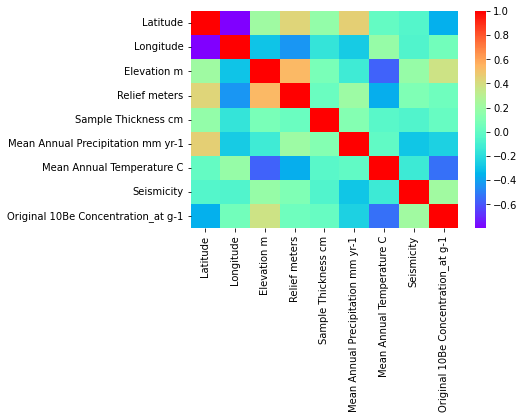

In [42]:
sns.heatmap(rocks.corr(),cmap='rainbow')

In [ ]:
#making X data and y variate data
# lets try predicting CRONUS Errosion rates first

X = rocks[[
         #'Sample ID',
         'Original 10Be Concentration_at g-1',
         #'Original 10Be Concentration Error_at g-1',
         #'CRONUS Erosion Rate_m My-1',
         #'CRONUS Erosion Rate Error_m My-1',
         #'Percent Difference between Published and CRONUS Erosion Rates',
         'Elevation meters', 
         'Relief meters', 
         #'Rock Type specific',
         #'Rock Type general', 
         #'Sample Thickness cm', 
         #'Sample Geometry',
         'Mean Annual Precipitation mm yr-1', 
         'Mean Annual Temperature C',
         'Seismicity',
         #'Climate Zone main',
         #'Climate Zone sub-category',
         'Latitude',
         'Longitude'
        ]]


y = rocks['CRONUS Erosion Rate_m My-1']

In [17]:
X= rocks
y = df2_new['CRONUS Erosion Rate_m My-1']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

X_train, X_test, y_train, y_test = train_test_split(X, y)#=np.random.RandomState(0))

pcr = make_pipeline(StandardScaler(), PCA(n_components=3), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=3)
pls.fit(X_train, y_train)

PLSRegression(n_components=3)

In [158]:
X

,Latitude,Longitude,Elevation m,Relief meters,Sample Thickness cm,Mean Annual Precipitation mm yr-1,Mean Annual Temperature C,Seismicity,Original 10Be Concentration_at g-1
0,35.834566,-106.371692,2483.0,1042.0,3.0,520.0,6.0,0.659110,1880000.0
1,35.792952,-106.271056,2020.0,567.0,3.0,368.0,9.0,0.659110,2750000.0
2,35.787481,-106.244529,1971.0,499.0,3.0,355.0,10.0,0.659110,2755000.0
3,35.787481,-106.244529,1971.0,499.0,3.0,355.0,10.0,0.659110,2910000.0
4,35.787481,-106.244529,1971.0,499.0,3.0,355.0,10.0,0.659110,2600000.0
...,...,...,...,...,...,...,...,...,...
525,-33.405067,150.173246,1124.0,281.0,3.0,1103.0,10.0,0.867291,549000.0
526,-33.404839,150.173625,1124.0,281.0,3.0,1103.0,10.0,0.867291,548000.0
527,-33.552444,150.221720,1037.0,434.0,3.0,1099.0,11.0,0.890189,403000.0
528,-33.413136,150.165956,1074.0,290.0,3.0,957.0,11.0,0.867291,167000.0


In [159]:
pcr.fit

<bound method Pipeline.fit of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=3)),
                ('linearregression', LinearRegression())])>

In [19]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PCR r-squared 0.155
PLS r-squared 0.135


In [21]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [22]:
regr = make_pipeline(StandardScaler(), SVR(C=49.0, gamma=67,epsilon=4))
regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=49.0, epsilon=4, gamma=67))])

In [23]:
regr.score(X_test, y_test)

0.2743508437292843

In [389]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
C_range = np.linspace(1e-2, 100000, 20)
gamma_range = np.linspace(1e-09, 1e-04, 20)
param_grid = dict(C=C_range, gamma=gamma_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVR(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

#print("The best parameters are with a score of", (grid.best_params_, grid.best_score_))

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [394]:
df3_new.shape

(1393, 28)

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
1388   -1
1389   -1
1390   -1
1391   -1
1392   -1
Name: Longitude, Length: 1393, dtype: int64

In [80]:
for i in X:
    #print(i)
    
    for j in X[i].items():
        if type(j) is str:
            print(j)
        


In [12]:
df3_ = df3_new.ffill(axis=0)

In [24]:
import tensorflow
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import umap

In [25]:
data = pd.read_csv('test.csv',header=0,index_col=0)

In [26]:
data

,Citation,Sample ID,Location,Latitude,Longitude,Elevation m,Basin Relief (m)b,Basin Area (km2)c,Mean Latitude (decimal degrees)d,Mean Longitude (decimal degrees)d,...,Climate Zone (Main)j,Climate Zone (Sub-category)j,Original 10Be Concentration_at g-1,Original 10Be Concentration Error_at g-1,AMS Standard,Published Erosion Rate (m My-1)k,Published Erosion Rate Error (m My-1)k,CRONUS Erosion Rate_m My-1,CRONUS Erosion Rate Error_m My-1,% Difference between Published and CRONUS Erosion Ratesl
0,Abbuhl et al. (2010),Piu11,"Yapatera River, Peru",-4.9181,-79.8939,3076.2090,141,1.141300,-4.9296,-4.9181,...,Arid,Hot Steppe,2233000.0,54000.0,NIST_30300,8.86,1.26,6.95,0.72,-21.557562
1,Abbuhl et al. (2010),Piu10,"Yapatera River, Peru",-4.9451,-79.9960,2079.6367,2286,93.879601,-4.9071,-4.9451,...,Arid,Hot Steppe,73200.0,5600.0,NIST_30300,157.00,24.00,128.23,13.19,-18.324841
2,Abbuhl et al. (2010),Piu9,"Yapatera River, Peru",-5.0183,-80.0537,1671.0070,3078,153.989000,-4.9376,-5.0183,...,Arid,Hot Steppe,62400.0,5200.0,NIST_30300,155.00,24.00,126.29,13.51,-18.522581
3,Abbuhl et al. (2010),Piu8,"Yapatera River, Peru",-5.0856,-80.1315,1437.6952,3250,186.689000,-4.9563,-5.0856,...,Arid,Hot Steppe,59100.0,5300.0,NIST_30300,148.00,24.00,122.11,13.64,-17.493243
4,Abbuhl et al. (2010),Piu6,"Yapatera River, Peru",-5.1041,-80.1583,1394.2614,3264,192.974000,-4.9607,-5.1041,...,Arid,Hot Steppe,79200.0,3900.0,NIST_30300,107.60,15.00,89.53,7.33,-16.793680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,Wittmann et al. (2009),MAR 18a-2,"Mamoré at Guayaramerin, Bolivia",-10.8080,-65.3460,584.3517,4952,467143.000000,-15.1748,-64.0680,...,Tropical,Savannah,53300.0,20800.0,S555,80.00,30.00,109.99,51.81,37.487500
1389,Wittmann et al. (2009),MAD 19a,"Madeira at Ribeirao, Bolivia",-10.2290,-65.2810,727.6167,6309,770668.000000,-14.4085,-65.7867,...,Tropical,Savannah,39700.0,5200.0,S555,120.00,20.00,169.28,25.14,41.066667
1390,Wittmann et al. (2009),MAD 20a,"Madeira at Porto Velho, Bolivia",-8.7700,-63.9090,688.9935,6349,828386.000000,-14.1123,-65.7812,...,Tropical,Savannah,35250.0,3750.0,S555,130.00,15.00,186.22,23.33,43.246154
1391,Wittmann et al. (2009),MAD 20a-1,"Madeira at Porto Velho, Bolivia",-8.7700,-63.9090,688.9935,6349,828386.000000,-14.1123,-65.7812,...,Tropical,Savannah,38700.0,4100.0,S555,120.00,10.00,169.26,21.16,41.050000


In [106]:
X = data[[
       #'Citation', 
       #'Sample ID', 
       #'Location', 
       'Latitude', 
       'Longitude',
       'Elevation m', 
       #'Basin Relief (m)b', 
       'Basin Area (km2)c',
       #'Mean Latitude (decimal degrees)d', 
       #'Mean Longitude (decimal degrees)d',
       #'Effective Basin Elevation (m)d', 
       'Mean Basin Slope (°)e',
       #'Rock Type general', 
       'Mean Annual Precipitation (mm yr-1)f',
       'Mean Annual Temperature (°C)f',
       '% Vegetationg', 
       'Seismicityh',
       #'Seismic Regimei', 
       #'Climate Zone (Main)j',
       #'Climate Zone (Sub-category)j', 
       #'Original 10Be Concentration_at g-1',
       #'Original 10Be Concentration Error_at g-1', 
       #'AMS Standard',
       #'Published Erosion Rate (m My-1)k',
       #'Published Erosion Rate Error (m My-1)k', 
       'CRONUS Erosion Rate_m My-1',
       #'CRONUS Erosion Rate Error_m My-1',
       #'% Difference between Published and CRONUS Erosion Ratesl'
    
    
]]

In [95]:
y = data[[
       #'Citation', 
       #'Sample ID', 
       #'Location', 
       #'Latitude', 
       #'Longitude',
       #'Elevation m', 
       #'Basin Relief (m)b', 
       #'Basin Area (km2)c',
       #'Mean Latitude (decimal degrees)d', 
       #'Mean Longitude (decimal degrees)d',
       #'Effective Basin Elevation (m)d', 
       #'Mean Basin Slope (°)e',
       #'Rock Type general', 
       #'Mean Annual Precipitation (mm yr-1)f',
       #'Mean Annual Temperature (°C)f',
       #'% Vegetationg', 
       #'Seismicityh',
       #'Seismic Regimei', 
       #'Climate Zone (Main)j',
       #'Climate Zone (Sub-category)j', 
       #'Original 10Be Concentration_at g-1',
       #'Original 10Be Concentration Error_at g-1', 
       #'AMS Standard',
       #'Published Erosion Rate (m My-1)k',
       #'Published Erosion Rate Error (m My-1)k', 
       'CRONUS Erosion Rate_m My-1',
       #'CRONUS Erosion Rate Error_m My-1',
       #'% Difference between Published and CRONUS Erosion Ratesl'
    
    
]]

In [40]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(X)
embedding.shape

ValueError: could not convert string to float: 'Mixed'

In [39]:
scaler = StandardScaler()
scaler.fit(X)
Xsc = scaler.transform(X)
reducer = umap.UMAP()
embedding = reducer.fit_transform(Xsc)
embedding.shape

ValueError: could not convert string to float: 'Mixed'

<AxesSubplot:>

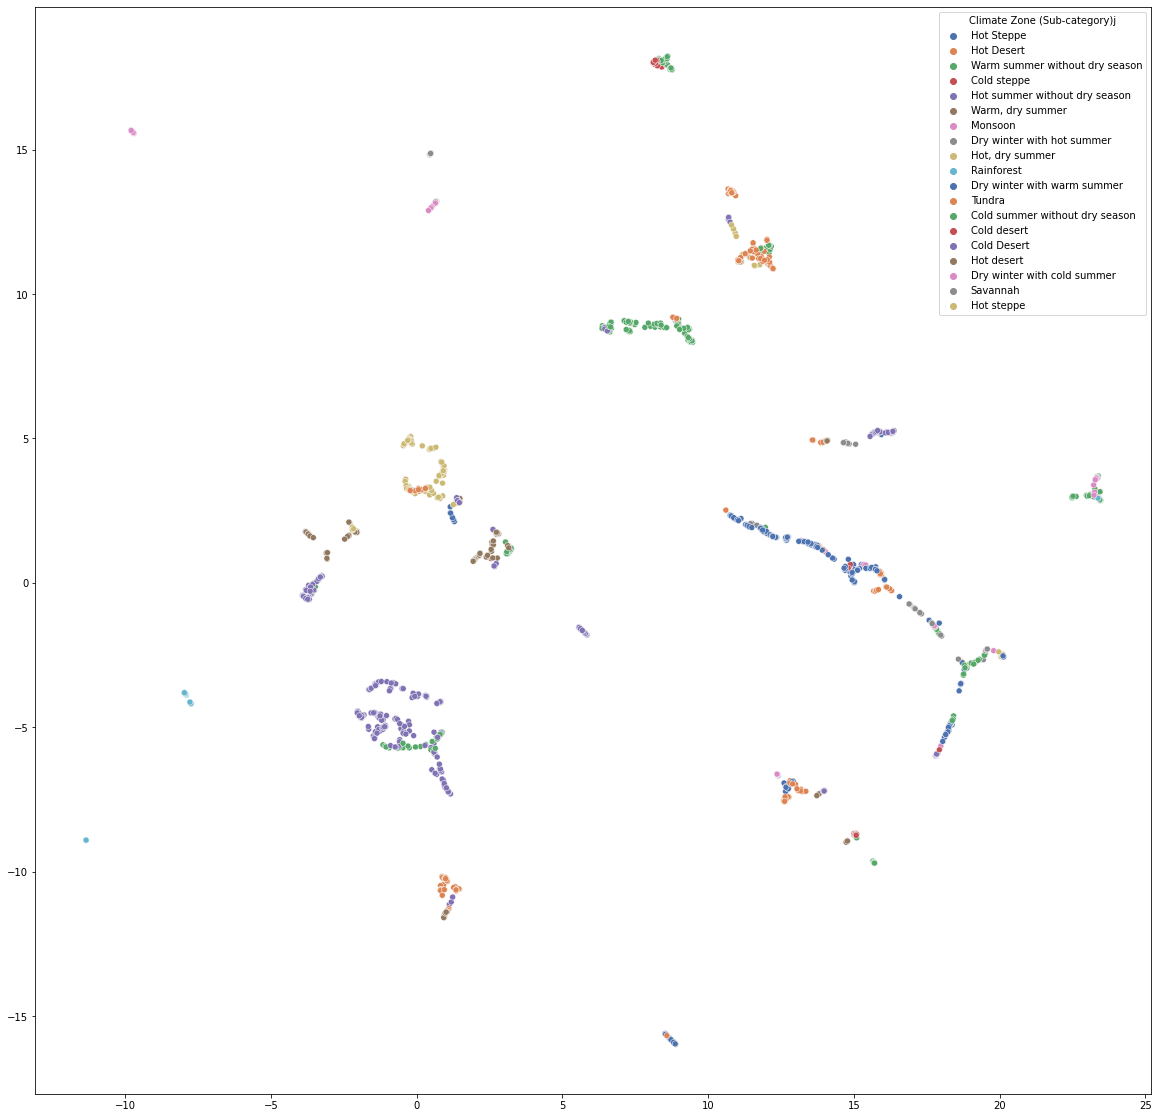

In [31]:
plt.figure(figsize = (20,20))
sns.scatterplot(x = embedding[:,0], y = embedding[:,1],hue=data['Climate Zone (Sub-category)j'],palette='deep')

In [33]:
import umap.plot
umap.plot.diagnostic(reducer, diagnostic_type='pca')

/Users/josemarmolejo/miniconda3/envs/GIS/lib/python3.10/site-packages/umap/plot.py:20: UserWarning: The umap.plot package requires extra plotting libraries to be installed.
    You can install these via pip using

    pip install umap-learn[plot]

    or via conda using

     conda install pandas matplotlib datashader bokeh holoviews colorcet scikit-image
    
  warn(


ImportError: umap.plot requires pandas matplotlib datashader bokeh holoviews scikit-image and colorcet to be installed

In [42]:
Xsc

array([[-1.27731182, -0.63499352,  1.22805133, ...,  1.55737136,
         1.93192016, -0.48088438],
       [-1.27845071, -0.63621079,  0.40724018, ...,  1.55737136,
        -0.30558812, -0.18689278],
       [-1.28153837, -0.63689871,  0.07067874, ...,  1.54618282,
        -0.3167767 , -0.19159549],
       ...,
       [-1.43978951, -0.44441608, -0.73814129, ...,  0.80521886,
        -0.34490354, -0.04632078],
       [-1.43978951, -0.44441608, -0.73814129, ...,  0.80521886,
        -0.34132941, -0.08743306],
       [-1.43978951, -0.44441608, -0.73814129, ...,  0.80521886,
        -0.34847767,  0.00373633]])

In [ ]:
from umap.parametric_umap import ParametricUMAP
embedder = ParametricUMAP(n_epochs = 5000, verbose=True)
embedding = embedder.fit_transform(Xsc)




/Users/josemarmolejo/miniconda3/envs/GIS/lib/python3.10/site-packages/umap/parametric_umap.py:148: UserWarning: tensorflow_probability not installed or incompatible to current                 tensorflow installation. Setting global_correlation_loss_weight to zero.
  warn(


ParametricUMAP(optimizer=<keras.optimizers.optimizer_v2.adam.Adam object at 0x1a0826a70>)
Mon Dec 19 10:30:21 2022 Construct fuzzy simplicial set


In [41]:
embedding

array([[ 17.803446  ,  -5.974692  ],
       [  8.549898  , -15.640041  ],
       [  8.714304  , -15.805965  ],
       ...,
       [ 17.07166   ,  -0.87244445],
       [ 17.081781  ,  -0.87993366],
       [ 17.100267  ,  -0.89777404]], dtype=float32)

In [44]:
X

,Latitude,Longitude,Elevation m,Basin Area (km2)c,Mean Latitude (decimal degrees)d,Mean Longitude (decimal degrees)d,Effective Basin Elevation (m)d,Mean Basin Slope (°)e,Rock Type general,Mean Annual Precipitation (mm yr-1)f,Mean Annual Temperature (°C)f,% Vegetationg,Seismicityh,Climate Zone (Sub-category)j,Original 10Be Concentration_at g-1,CRONUS Erosion Rate_m My-1
0,-4.9181,-79.8939,3076.2090,1.141300,-4.9296,-4.9181,3076.4,7.238555,Mixed,735.00000,12.000000,5.000000,2.916137,Hot Steppe,2233000.0,6.95
1,-4.9451,-79.9960,2079.6367,93.879601,-4.9071,-4.9451,2160.1,20.069866,Mixed,814.92859,16.562500,9.263158,2.916137,Hot Steppe,73200.0,128.23
2,-5.0183,-80.0537,1671.0070,153.989000,-4.9376,-5.0183,1806.4,20.767794,Mixed,715.77838,18.329729,9.335136,2.904053,Hot Steppe,62400.0,126.29
3,-5.0856,-80.1315,1437.6952,186.689000,-4.9563,-5.0856,1629.5,19.163195,Mixed,638.76685,19.224215,8.767858,2.904053,Hot Steppe,59100.0,122.11
4,-5.1041,-80.1583,1394.2614,192.974000,-4.9607,-5.1041,1598.4,18.589653,Mixed,625.62610,19.369566,8.653680,2.904053,Hot Steppe,79200.0,89.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,-10.8080,-65.3460,584.3517,467143.000000,-15.1748,-64.0680,975.1,4.067111,Mixed,1515.87700,23.182580,58.581250,0.842297,Savannah,53300.0,109.99
1389,-10.2290,-65.2810,727.6167,770668.000000,-14.4085,-65.7867,1232.0,6.020555,Mixed,1661.63000,22.677130,60.171520,0.995375,Savannah,39700.0,169.28
1390,-8.7700,-63.9090,688.9935,828386.000000,-14.1123,-65.7812,1185.0,5.757189,Mixed,1674.14900,22.884930,61.299060,2.103787,Savannah,35250.0,186.22
1391,-8.7700,-63.9090,688.9935,828386.000000,-14.1123,-65.7812,1185.0,5.757189,Mixed,1674.14900,22.884930,61.299060,2.103787,Savannah,38700.0,169.26


In [132]:
X_train, X_test, y_train, y_test = train_test_split(embedding, y)
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.3568756193321836

In [85]:
from sklearn.neighbors import KNeighborsRegressor

In [105]:
X_train

,Latitude,Longitude,Elevation m,Basin Area (km2)c,Mean Basin Slope (°)e,Mean Annual Precipitation (mm yr-1)f,Mean Annual Temperature (°C)f,% Vegetationg,Seismicityh
779,46.979074,7.934254,1155.08020,5.050530,19.378489,1378.777800,5.222222,79.555557,0.855054
1098,-16.779160,-67.221530,2731.02000,3.354740,32.876827,902.750000,14.500000,77.800003,2.081661
812,31.300000,103.530000,3004.19800,15.977300,34.838470,1013.666700,5.571429,32.333332,1.347979
275,33.077150,-114.569650,123.00000,2.176980,6.300481,97.199997,22.000000,5.000000,0.756563
519,34.752000,99.693000,4294.98390,3.848360,23.353048,457.833340,-4.333340,14.916667,0.879949
...,...,...,...,...,...,...,...,...,...
1201,41.070000,-111.840000,2272.38480,5.626760,27.108797,690.909120,4.636364,10.181818,1.923023
1079,-15.376780,-68.166700,1671.24000,120.107000,26.417845,1208.180000,19.230000,64.599998,1.996380
1372,-10.820000,-66.110000,280.85530,33680.102000,2.332941,1884.561000,24.641850,77.756330,1.068783
866,28.380000,101.880000,2876.70090,8.234960,31.951824,1017.833300,9.916667,37.666668,2.544292


In [119]:
regr = SVR(epsilon=.001)
regr.fit(X_train, y_train)
regr.score(X_test,y_test) * 100

11.891333059683095

In [79]:
X

array([[-1.27731182, -0.63499352,  1.22805133, ...,  0.22171458,
        -1.28649203,  1.55737136],
       [-1.27845071, -0.63621079,  0.40724018, ...,  0.87876465,
        -1.14221631,  1.55737136],
       [-1.28153837, -0.63689871,  0.07067874, ...,  1.13326501,
        -1.1397804 ,  1.54618282],
       ...,
       [-1.43978951, -0.44441608, -0.73814129, ...,  1.78926395,
         0.61880615,  0.80521886],
       [-1.43978951, -0.44441608, -0.73814129, ...,  1.78926395,
         0.61880615,  0.80521886],
       [-1.43978951, -0.44441608, -0.73814129, ...,  1.78926395,
         0.61880615,  0.80521886]])

In [117]:
X_train, X_test, y_train, y_test = train_test_split(embedding, y)

In [107]:
scaler = StandardScaler()
scaler.fit(X)
Xsc = scaler.transform(X)

In [108]:
X = Xsc[:,:9]
y = Xsc[:,-1]

In [109]:
X[:,-1]

array([1.55737136, 1.55737136, 1.54618282, ..., 0.80521886, 0.80521886,
       0.80521886])

In [110]:
y

array([-0.48088438, -0.18689278, -0.19159549, ..., -0.04632078,
       -0.08743306,  0.00373633])

In [116]:
from umap.parametric_umap import ParametricUMAP

embedder = ParametricUMAP(n_epochs = 5000, verbose=True,n_components=2)
embedding = embedder.fit_transform(X, y = y)

/Users/josemarmolejo/miniconda3/envs/GIS/lib/python3.10/site-packages/umap/parametric_umap.py:148: UserWarning: tensorflow_probability not installed or incompatible to current                 tensorflow installation. Setting global_correlation_loss_weight to zero.
  warn(


ParametricUMAP(optimizer=<keras.optimizers.optimizer_v2.adam.Adam object at 0x16a7fdf60>)
Thu Dec 22 10:35:11 2022 Construct fuzzy simplicial set
Thu Dec 22 10:35:12 2022 Finding Nearest Neighbors
Thu Dec 22 10:35:12 2022 Finished Nearest Neighbor Search
Thu Dec 22 10:35:12 2022 Construct embedding


2022-12-22 10:35:32.871307: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
5518/5518 [==============================] - 29s 5ms/step - loss: 0.1061
Epoch 2/10
5518/5518 [==============================] - 29s 5ms/step - loss: 0.0938
Epoch 3/10
5518/5518 [==============================] - 30s 6ms/step - loss: 0.0915
Epoch 4/10
5518/5518 [==============================] - 30s 5ms/step - loss: 0.0897
Epoch 5/10
5518/5518 [==============================] - 30s 5ms/step - loss: 0.0884
Epoch 6/10
5518/5518 [==============================] - 30s 5ms/step - loss: 0.0877
Epoch 7/10
5518/5518 [==============================] - 31s 6ms/step - loss: 0.0876
Epoch 8/10
5518/5518 [==============================] - 30s 5ms/step - loss: 0.0872
Epoch 9/10
5518/5518 [==============================] - 32s 6ms/step - loss: 0.0867
Epoch 10/10
44/44 [==============================] - 0s 834us/step
Thu Dec 22 10:40:37 2022 Finished embedding


In [194]:
X

array([[-1.27731182, -0.63499352,  1.22805133, ...,  0.22171458,
        -1.28649203,  1.55737136],
       [-1.27845071, -0.63621079,  0.40724018, ...,  0.87876465,
        -1.14221631,  1.55737136],
       [-1.28153837, -0.63689871,  0.07067874, ...,  1.13326501,
        -1.1397804 ,  1.54618282],
       ...,
       [-1.43978951, -0.44441608, -0.73814129, ...,  1.78926395,
         0.61880615,  0.80521886],
       [-1.43978951, -0.44441608, -0.73814129, ...,  1.78926395,
         0.61880615,  0.80521886],
       [-1.43978951, -0.44441608, -0.73814129, ...,  1.78926395,
         0.61880615,  0.80521886]])

In [195]:
y

array([-0.48088438, -0.18689278, -0.19159549, ..., -0.04632078,
       -0.08743306,  0.00373633])

In [204]:
butt = data[[
       #'Citation', 
       #'Sample ID', 
       #'Location', 
       'Latitude', 
       'Longitude',
       'Elevation m', 
       #'Basin Relief (m)b', 
       'Basin Area (km2)c',
       #'Mean Latitude (decimal degrees)d', 
       #'Mean Longitude (decimal degrees)d',
       #'Effective Basin Elevation (m)d', 
       'Mean Basin Slope (°)e',
       #'Rock Type general', 
       'Mean Annual Precipitation (mm yr-1)f',
       'Mean Annual Temperature (°C)f',
       '% Vegetationg', 
       'Seismicityh',
       #'Seismic Regimei', 
       #'Climate Zone (Main)j',
       #'Climate Zone (Sub-category)j', 
       #'Original 10Be Concentration_at g-1',
       #'Original 10Be Concentration Error_at g-1', 
       #'AMS Standard',
       #'Published Erosion Rate (m My-1)k',
       #'Published Erosion Rate Error (m My-1)k', 
       #'CRONUS Erosion Rate_m My-1',
       #'CRONUS Erosion Rate Error_m My-1',
       #'% Difference between Published and CRONUS Erosion Ratesl'
    
    
]]

In [144]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDRegressor

In [205]:
X_train, X_test, y_train, y_test = train_test_split(pca.fit_transform(butt), data['CRONUS Erosion Rate_m My-1'])
gnb = SGDRegressor(alpha=1000).fit(X_train, y_train)
gnb.fit(X_train, y_train)
gnb.score(X_test,y_test)*100

-1.1486745457410137e+32